In [21]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


In [22]:
employee_data = pd.read_csv("C:\\Users\\shivani shrivastava\\Downloads\\1576148666_ibmattritiondata.zip")
employee_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


# Data Cleaning & Preprocessing

In [23]:
employee_data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

# Exploratory Data Analysis

In [24]:
employee_data.shape

(1470, 13)

In [25]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [26]:
employee_data.select_dtypes(include=['object']).dtypes

Attrition         object
Department        object
EducationField    object
MaritalStatus     object
dtype: object

In [27]:
employee_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [28]:
# let's encode the attrition column so we can use it for EDA
employee_data['Attrition'] = employee_data['Attrition'].factorize(['No','Yes'])[0]
employee_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


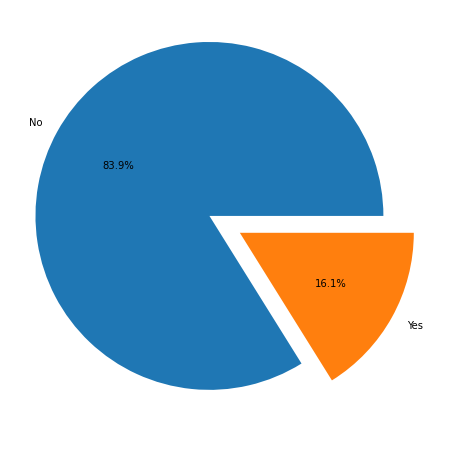

In [29]:
plt.figure(figsize=(8,8))
pie = employee_data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [30]:
employee_data.select_dtypes(include=['int64']).dtypes

Age                        int64
Attrition                  int64
DistanceFromHome           int64
Education                  int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

## Distribution of "Age"

C:\Users\shivani shrivastava\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

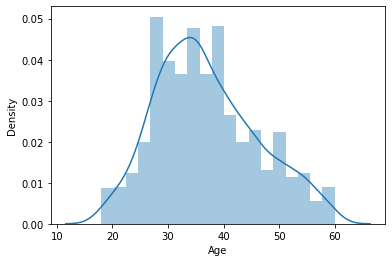

In [31]:
sns.distplot(employee_data["Age"])

In [32]:
employee_data[['Age']].value_counts().sort_values(ascending=False).head(10)

Age
35     78
34     77
36     69
31     69
29     68
32     61
30     60
38     58
33     58
40     57
dtype: int64

In [33]:
employee_data[['Age']].value_counts().sort_values(ascending=False).tail()

Age
59     10
19      9
18      8
60      5
57      4
dtype: int64

## Most employees are in their 30s with 35 year olds having the highest count and lowest are people at around the age 60 or less than 20.

## Plotting a Heatmap to assess correlations between different features¶

C:\Users\shivani shrivastava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

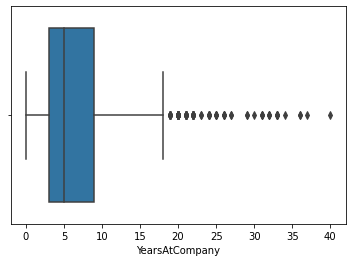

In [34]:
sns.boxplot(employee_data["YearsAtCompany"])

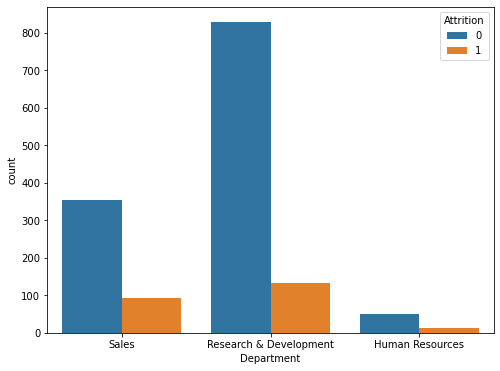

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='Department', hue='Attrition', data=employee_data);

In [37]:
employee_data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Most attritions are from the research & development department only for sales department to come second by a small margin. HUman resources has the least number of attritions. But we need to keep in mind that R&D has a lot more employees than sales and HR.

If we considered percentage of attritions per department, we would see that the HR department has most attritions.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

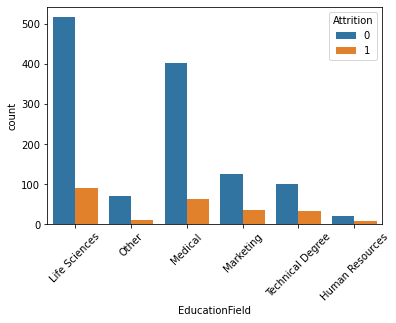

In [41]:
sns.countplot(x='EducationField', hue='Attrition', data=employee_data);
plt.xticks(rotation=45)

## the degrees of employees really matter here as most of the number of attritions are similar.

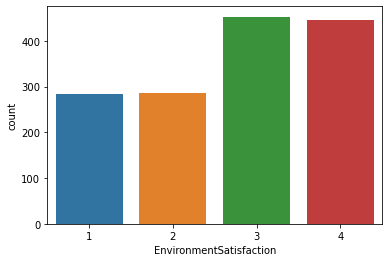

In [43]:
sns.countplot(x='EnvironmentSatisfaction', data=employee_data);

## Most employees seem to be satisfied with the working environment.

## Splitting Data

In [45]:
# Separating the features from the target (In the process, we will drop features that we don't think are key factors.)
X = employee_data.drop(['Attrition','EducationField'],axis=1) # Features
y = employee_data['Attrition'] # Target

In [46]:
# Label encoding the categorical variables

X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])

In [47]:
# Data Standardization
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [48]:
# Splitting Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [49]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 11)
(1176, 11)
(294, 11)


# Model Building

In [59]:
classifiers=[]

In [60]:
model2 = LogisticRegression() 
classifiers.append(model2)

In [61]:
classifiers


[LogisticRegression()]

In [65]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    clrep=classification_report(y_test,y_pred)
    print("\n\nAccuracy of %s is %s"%(clf, acc))
    print("\n\nClassification Report: \n%s"%(clrep))
    cm = confusion_matrix(ytest, ypred)
    print("Confusion Matrix of %s is\n %s"
          %(clf, cm))
    print("--------------------------------------------------------------------------")



Accuracy of LogisticRegression() is 0.8469387755102041


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       246
           1       0.80      0.08      0.15        48

    accuracy                           0.85       294
   macro avg       0.82      0.54      0.53       294
weighted avg       0.84      0.85      0.79       294



NameError: name 'confusion_matrix' is not defined